# Jamboree Education
- Jamboree has established a reputation for helping students excel in standardized tests such as GMAT, GRE, and SAT through unique problem-solving methods.
- The new feature focuses on simplifying decision-making for students by providing a data-driven probability score for Ivy League admissions, targeting Indian aspirants.

# Objective of the case study
- To analyze and enhance the newly launched Ivy League admission predictor feature on Jamboree’s website. 
- The tool estimates a student's probability of getting into an Ivy League college based on their academic and extracurricular credentials.

In [ ]:
# Approach
- Basic Data Analysis
- Exploratory Data Analysis
    - Univariate, Bivariate, Multivariate Analysis
    - Target vs Features
- Statistical Tests
    - Chisquare, Anova Test
- 

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew, kurtosis

In [2]:
#Load Dataset
path = r"F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\Business-Case-Study\Jamboree\Dataset"
raw_df = pd.read_csv(path + "\Jamboree_Admission.csv")
raw_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Data Analysis

In [3]:
#Statistics of Dataset
raw_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Inference:
- **Serial No.**: Unique values
- **GRE Score**: 
    - Ranges from 290 to 340
    - Mean ~= Median
- **TOEFL Score**: 
    - Ranges from 92 to 120
    - Mean ~= Median
- **University Rating**: 
    - Ranges from 1 to 5
    - Discrete values (Categorical)
- **SOP**: `Statement of Purpose`
    - Ranges from 1 to 5
- **LOR**: `Letter of Recommendation`
    - Ranges from 1 to 5
- **CGPA**: `Cumulative Grade Point Average`
    - Ranges from 6.8 to 9.92
- **Research**: `Experience in Research`
    - Binary Feature
- **Change of Admit**: `Probability of getting Admission`
    - Ranges from 0 to 1   

In [4]:
#Characteristics of Dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Inference:
- **No Null Values** in the dataset
- **All are numerical** variables

In [9]:
raw_df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

### Inference:
- All unique values in Serial No.
- Discrete Variables: **University Rating**, **SOP**, **LOR**, Research
- Continuous Variables: **GRE Score**, **TOEFL Score**, **CGPA**, **Chance of Admit**

# Exploratory Data Analysis
- Univariate Analysis
    - Categorical: *Frequency and Proportion Plots*
    - Numerical: *Distribution and Box plots*
    - *Skewness and Kurtosis*
- Bivariate Analysis
- Multivariate Analysis

## Univariate Analysis

In [75]:
def univariate_plot(df, feature):
    plt.figure(figsize=(12,4))   
    if df[feature].nunique() < 10:
        # Categorical Feature 
        plt.suptitle('Univariate Analysis of ' + feature + ": Frequency and Proportion")
        plt.subplot(1,2,1)
        sns.countplot(data=df, x=feature) 
        plt.subplot(1,2,2)
        labels = df[feature].value_counts().index
        plt.pie(x=list(df[feature].value_counts()), labels=list(labels), autopct="%0.2f")        
        plt.show()
    else:
        # Numerical Feature
        plt.suptitle('Univariate Analysis of ' + feature + ": Distribution and Box Plot")
        plt.subplot(1,2,1)
        sns.histplot(df[feature], kde=True, bins=20)
        plt.subplot(1,2,2)
        sns.boxplot(df[feature])
        plt.xlabel(feature)

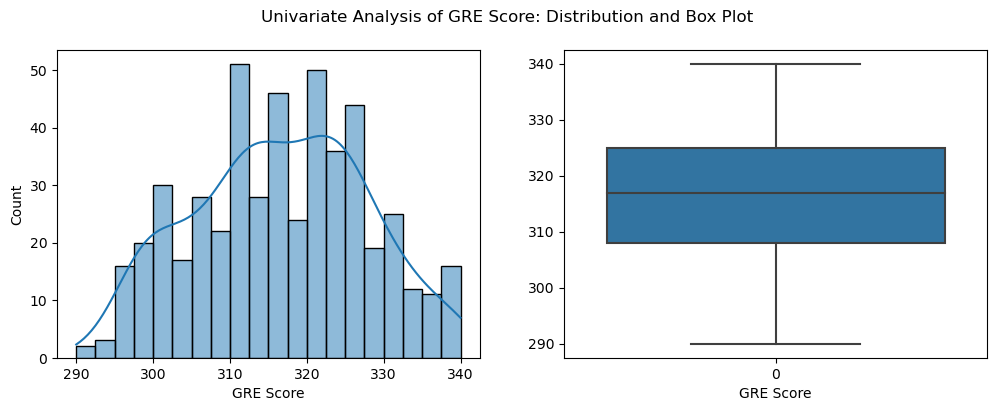

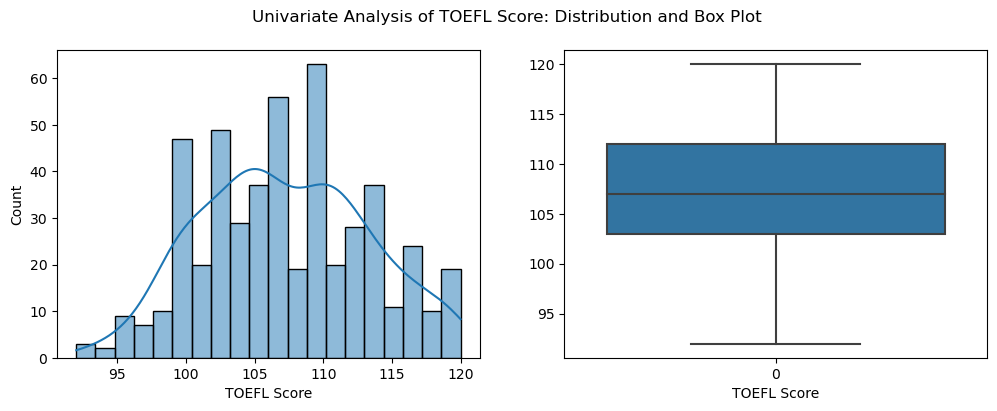

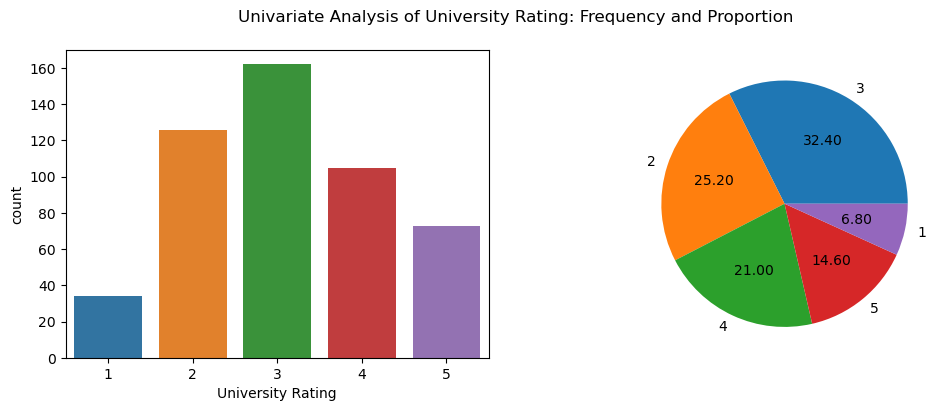

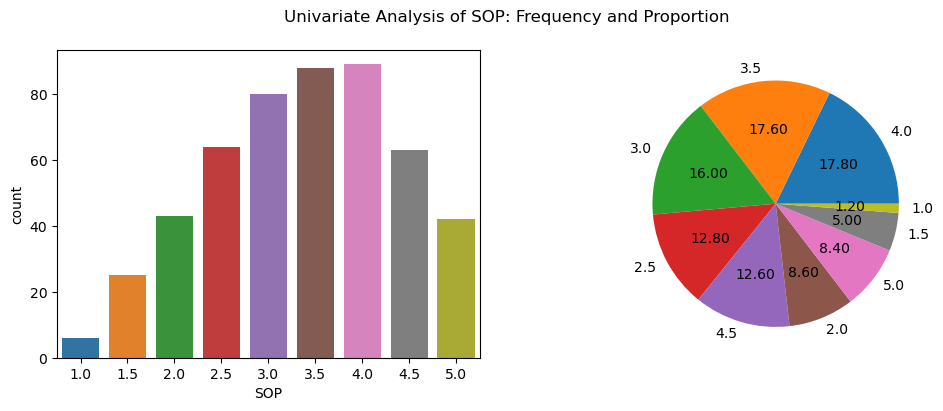

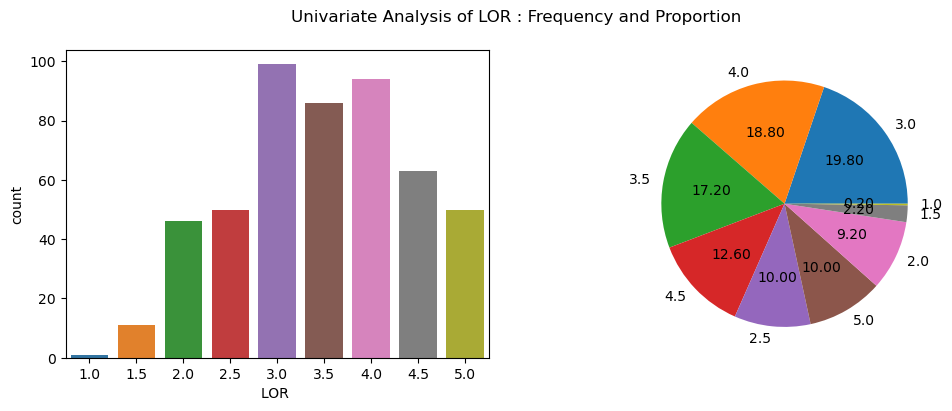

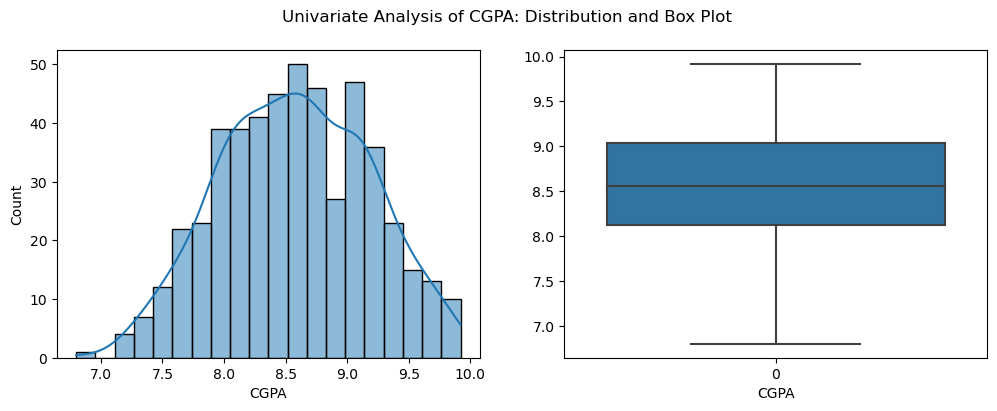

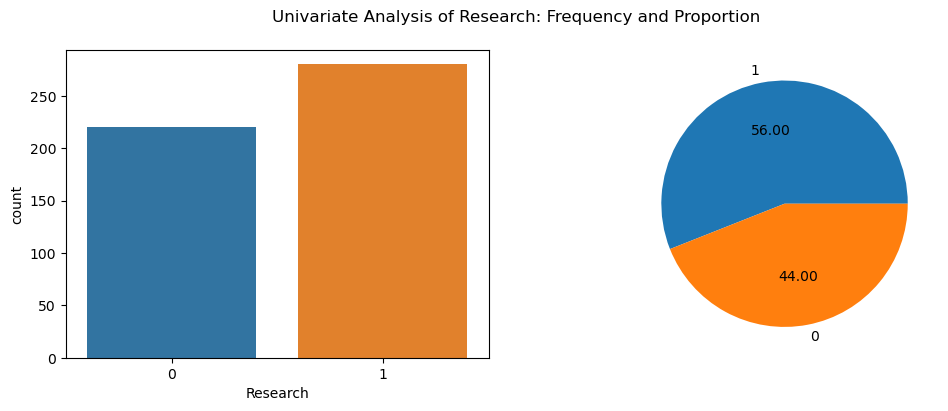

In [76]:
features = list(raw_df.columns)[1:-1]
for feature_name in features:
    univariate_plot(raw_df, feature_name)

### Inference:
- GRE Score, TOEFL Score:
    - Data lies between inter quartile range (IQR), hence outliers doesn't exist
    - Normally distributed and spread out or flat peak
    - No missing range in the data as there are no gaps observed
- CGPA:
    - Data lies between inter quartile range (IQR), hence outliers doesn't exist
    - Normally distributed and sharp peak
    - Gap between 7 and 7.5 indicating the missing range in the data
- University Rating:
    - Ratings in the range 2-4 being 80% of proportion
    - Average rating (3) being the top most
- SOP Strength:
    - Strength in the range 2.5-4.5 being 80% of proportion
    - Average Strength (3.5 and 4.5) being the top most  
- LOR Strength:
    - Strength in the range 3-4 being ~60% of proportion
    - Average Strength (3) being the top most
- Research:
    - Almost equally distributed

In [78]:
skew_list = []
kurt_list = []
for feature in features:
    skew_list.append(np.round(skew(raw_df[feature]),2))
    kurt_list.append(np.round(kurtosis(raw_df[feature]),2))
pd.DataFrame(data=[skew_list, kurt_list], index = ['Skew', 'Kurtosis'], columns=features)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Skew,-0.04,0.10,0.09,-0.23,-0.14,-0.03,-0.24
Kurtosis,-0.72,-0.66,-0.81,-0.71,-0.75,-0.57,-1.94


### Inference:
- **GRE score** and **CGPA** are almost **symmetric**
- **TOEFL Score and University Rating** are slightly **right skewed** indicating the minimal outliers on the right side 
- **SOP, LOR and Research** are **left skewed** indicating the presence of outliers on the left side 

## Multivariate Analysis

In [82]:
num_features = [feature for feature in features if raw_df[feature].nunique() > 10]
cat_features = [feature for feature in features if raw_df[feature].nunique() <= 10]

### Categorical Feature Analysis

In [95]:
def bivariateplot1xn(df, cat_features, plot_feature):
    plt.figure(figsize=(12,4))
    n = len(cat_features)-1
    plt_count = 1
    for feature in cat_features:
        if plot_feature != feature:
            plt.suptitle(plot_feature + " vs Other features")
            plt.subplot(1,n,plt_count)
            sns.countplot(data=df[cat_features], x=feature, hue=plot_feature)
            plt_count += 1

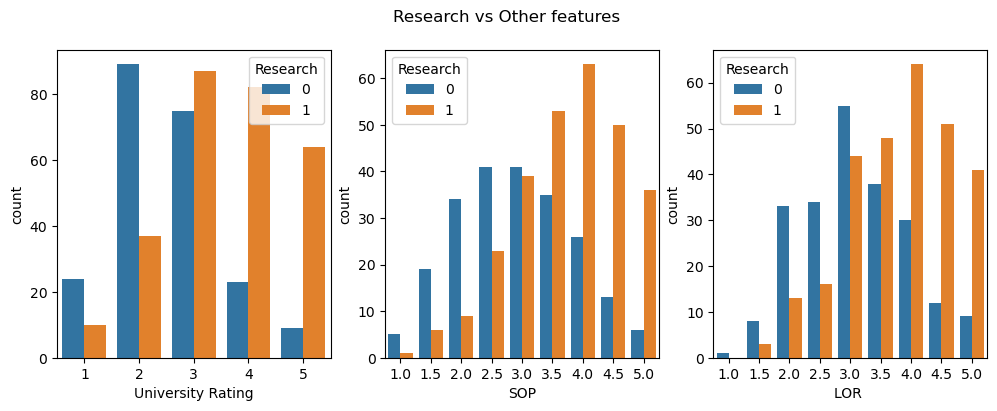

In [96]:
bivariateplot1xn(raw_df, cat_features, 'Research')

#### Inference:
- Students from universities with higher ratings (3+) are more likely to have research experience
- Students having research experience are more likely to have higher SOP and LOR strengths (3+)

<Axes: xlabel='LOR ', ylabel='University Rating'>

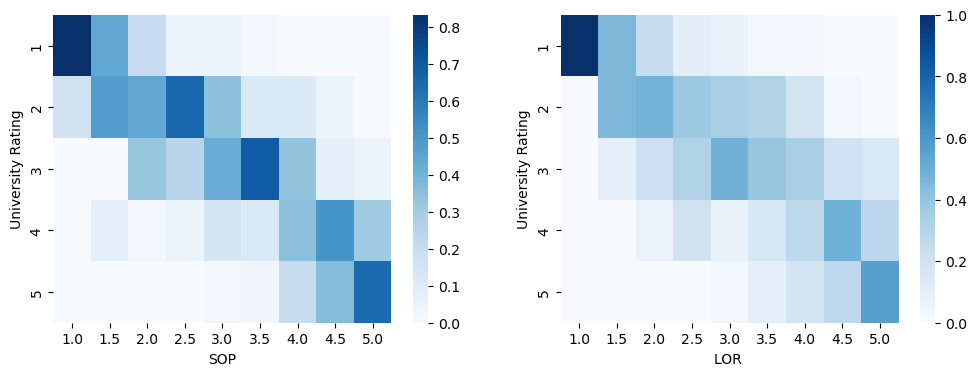

In [121]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ct = pd.crosstab(raw_df['University Rating'], raw_df['SOP'], normalize='columns')
sns.heatmap(ct, cmap='Blues')
plt.subplot(1,2,2)
ct = pd.crosstab(raw_df['University Rating'], raw_df['LOR '], normalize='columns')
sns.heatmap(ct, cmap='Blues')

<Axes: xlabel='LOR ', ylabel='SOP'>

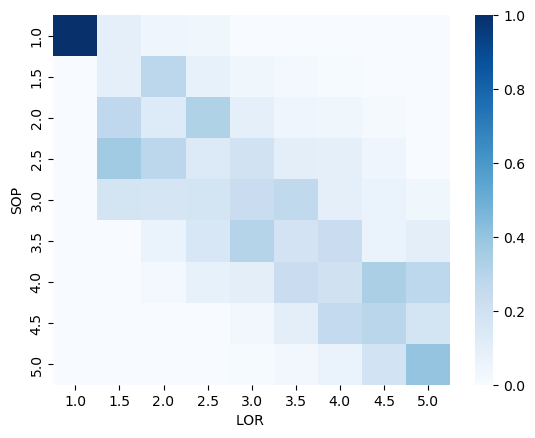

In [122]:
ct = pd.crosstab(raw_df['SOP'], raw_df['LOR '], normalize='columns')
sns.heatmap(ct, cmap='Blues')

#### Inference:
- Diagonal elements indicate a strong relationship between the University rating and SOP
- Diagonal elements indicate a weak relationship between the University rating and LOR
- Diagonal elements indicate a weak relationship between SOP and LOR

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x400 with 0 Axes>

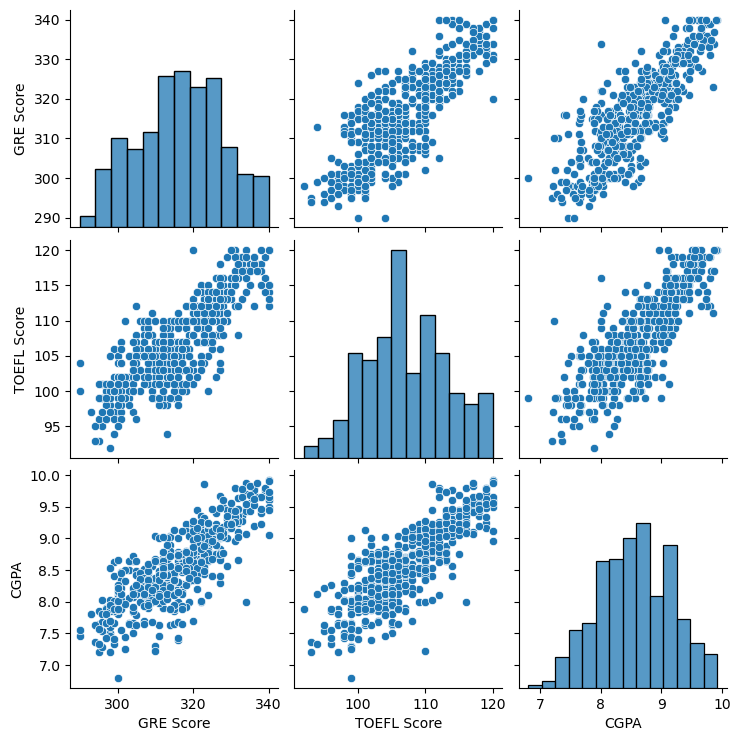

In [86]:
plt.figure(figsize=(12,4))
sns.pairplot(raw_df[num_features])

#### Inference:
- All 3 numerical features are highly linearly correlated
- Students having high CGPA are more likely to have higher GRE and TOEFL Score